# Numerical methods for Fredholm integral problem

### Team 19. 彭盛皓, 游人樺

Consider the integral problem: 
$$\int_{a}^{b}K(s,t)f(t)dt=g(s)$$ for all $s\in(a,b)$       (4a)\
where $K(s,t)$ is a given function of two variables (called the kernel) and $g(s)$ is a given function. From this equation we try to find the function $f(t)$ for $a\leq t\leq b$.
This is called a “Fredholm integral equation of the first kind”.\
One way to approximate the solution to this problem is to discretize $t$ and $s$. For example, let $(a,b)=(0,1)$ and take $s_i=t_i$ for $i=1,2,…,n$. Compute approximations $f_i\approx f(t_i)$ by solving the discrete system obtained by replacing the integral by a finite sum. For example, using the “rectangle rule” we would replace the (4a) by:
$$\frac{1}{n}\sum_{j=1}^{n}K(s_i,t_j)f_j=g(s_i)$$ for $i=1,2,...,n$.    (4b)\
This is an $n\times n$ system of linear equations $Kf=g$ where $K_{ij}=\frac{1}{n}K(s_i,t_j)$ and $g_i=g(s_i)$ are known.

#### (a) As a first example, take $K(s,t)=s^2+t^2$ on $(0,1)$ and construct a function $g$ so that (4a) has a solution $f(t)=1+t$. We can do this by computing $$g(s)=\int_{0}^{1}(s^2+t^2)(1+t)dt=\frac{3}{2}s^2+\frac{7}{12}.$$ Use $n=10$ and set up the linear system $Kf=g$. What happens if you try to solve this by setting $f=K\setminus g$

Import the neccessary libraries

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

Construct $K$ and $g$.

In [2]:
def g(x):
    return 3 * x**2 / 2 + 7 / 12

def K(x, y):
    return x**2 + y**2

Construct the condition of the question.

In [3]:
n = 100
si = np.linspace(0, 1, n)
ti = si
Kij = np.zeros((n, n))
gi = np.zeros(n)
for i in range(n):
    for j in range(n):
        Kij[(i, j)] = K(si[i], ti[j]) / n
print('Kij =',Kij)
for i in range(n):
    gi[i] = g(si[i])
print('gi =',gi)

Kij = [[0.00000000e+00 1.02030405e-06 4.08121620e-06 ... 9.60004081e-03
  9.79900010e-03 1.00000000e-02]
 [1.02030405e-06 2.04060810e-06 5.10152025e-06 ... 9.60106112e-03
  9.80002041e-03 1.00010203e-02]
 [4.08121620e-06 5.10152025e-06 8.16243240e-06 ... 9.60412203e-03
  9.80308132e-03 1.00040812e-02]
 ...
 [9.60004081e-03 9.60106112e-03 9.60412203e-03 ... 1.92000816e-02
  1.93990409e-02 1.96000408e-02]
 [9.79900010e-03 9.80002041e-03 9.80308132e-03 ... 1.93990409e-02
  1.95980002e-02 1.97990001e-02]
 [1.00000000e-02 1.00010203e-02 1.00040812e-02 ... 1.96000408e-02
  1.97990001e-02 2.00000000e-02]]
gi = [0.58333333 0.58348638 0.58394552 0.58471074 0.58578206 0.58715947
 0.58884298 0.59083257 0.59312825 0.59573003 0.59863789 0.60185185
 0.6053719  0.60919804 0.61333027 0.6177686  0.62251301 0.62756351
 0.63292011 0.6385828  0.64455158 0.65082645 0.65740741 0.66429446
 0.6714876  0.67898684 0.68679216 0.69490358 0.70332109 0.71204469
 0.72107438 0.73041016 0.74005204 0.75       0.7602540

Solve f.

In [4]:
fi = LA.inv(Kij) @ gi
print(fi)

[ 1.1673856e+07 -1.3764864e+07  2.0147200e+06  9.2160000e+03
 -4.6592000e+04 -2.6316800e+05  2.2835200e+05  2.2144000e+05
 -9.0816000e+04 -7.2448000e+04  6.9632000e+04  3.7888000e+04
  6.5024000e+04 -1.2748800e+05 -2.3808000e+04  3.9936000e+04
  1.5872000e+04  1.7952000e+04 -7.1680000e+03 -2.9440000e+03
  1.3568000e+04 -7.4240000e+03  1.2288000e+04 -2.9440000e+03
  9.4720000e+03 -3.0720000e+03 -1.9200000e+03  4.0640000e+03
 -1.8944000e+04  8.9600000e+03 -1.9520000e+03 -2.7200000e+03
 -5.8880000e+03  2.5600000e+03  5.1840000e+03 -2.2400000e+03
  5.1200000e+02  2.3040000e+03 -7.6800000e+03 -1.1520000e+03
 -1.3120000e+03  4.4800000e+02 -3.3280000e+03  6.7840000e+03
 -1.1520000e+03  1.2800000e+03  2.5600000e+02  3.5840000e+03
  2.3680000e+03 -3.3280000e+03 -2.4960000e+03 -2.3040000e+03
  1.0240000e+03  1.7920000e+03 -7.6800000e+02 -5.1200000e+02
 -1.7920000e+03 -1.8560000e+03 -1.3360000e+03  4.6080000e+03
  1.6000000e+03 -1.3760000e+03  5.7600000e+02 -1.7920000e+03
  2.3040000e+03 -1.79200

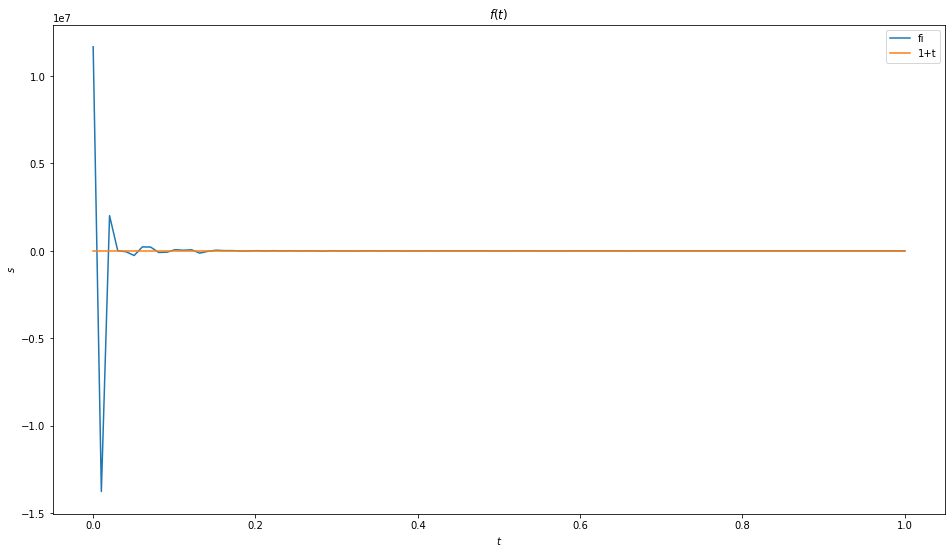

In [5]:
plt.figure(figsize=(16, 9))
plt.plot(si, fi)
plt.plot(ti, 1 + ti)
plt.ylabel(r'$s$')
plt.xlabel(r'$t$')
plt.title(r'$f(t)$')
plt.legend(["fi",'1+t'])
plt.show()

Here is the ill-condition that the value of $f$ becomes way to large, which is hard to calculate.

#### (b) Compute the SVD (singular value decomposition) of K. What is the rank of K?

We can easily use the numpy library to compute SVD.

In [6]:
U, sigma, VT = LA.svd(Kij)
D = np.zeros((n, n))
for i in range(n):
    D[i, i] = sigma[i]
print('U =',U)
print('D =',D)
print('V^T =',VT)
print('sigma =',sigma)

U = [[-0.05355175 -0.13961873 -0.00856491 ...  0.03629068 -0.21969149
  -0.03408078]
 [-0.05356388 -0.13958711  0.27075538 ... -0.2481457   0.17765387
  -0.13950745]
 [-0.05360026 -0.13949227  0.05266264 ...  0.05040978 -0.00340652
  -0.08567941]
 ...
 [-0.16764573  0.15784411  0.24045967 ... -0.00541836  0.10260611
  -0.19030105]
 [-0.17001031  0.16400898  0.26087584 ...  0.2825836  -0.19111034
   0.00191516]
 [-0.17239914  0.17023708  0.02794479 ...  0.04124303  0.25915988
  -0.18748522]]
D = [[7.85609411e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.15575741e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.30169374e-16 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.89969246e-17
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.78796177e-17 0.00000000e+00]


The rank of a matrix is equal to the number of non-zero singular values, so the rank of $K_{ij}$ is 2.

#### (c) We can use the SVD to compute the minimum norm least square solution for any right hand side $g$ to obtain $\hat{f}$, say. Do this for $g_i=\frac{3}{2}s_i^2+\frac{7}{12}$ and compare the solution $\hat{f}$ to our original $f(t)=1+t$.

Consider the minimum norm least square $min||Kf-g||_2^2$, let $K=K_{ij}$.\
Let $K=UDV^T$ be the SVD of $K\in R^{n\times n}, n=10$. \
Using the orthogonality of $U$ and $V$, we have 
$$||Kf-g||_2^2=||U^T(KVV^Tf-g)||_2^2=||DV^Tf-U^Tg||_2^2=\sum_{i=1}^{2}(\sigma_ih_i-u_i^Tg)^2+\sum_3^{10}(u_i^Tg)^2$$, where $h=V^Tf$\
Thus, $min||Kf-g||_2^2=\sum_{i=1}^{2}(\sigma_ih_i-u_i^Tg)^2+\sum_3^{10}(u_i^Tg)^2$\
The solution $h=[h_i]$, where $h_i=\frac{u_i^Tg}{\sigma_i}$ for $i=1,2$ and $h_i=arbitrary$ for $i=3,...,10$, since the rank of $K$ is $2$.\
So, the minimum solution of the linear least square problem is given by $h_i=\frac{u_i^Tg}{\sigma_i}$ for $i=1,2$ and $h_i=0$ for $i=3,...,10$.\
And, $\hat{f}=Vh$. Therefore, the minimum norm solution is $\hat{f}_i=v_ih$

Next, construct $\hat{f}=[\hat{f}_i]$ in Python.

In [7]:
h = np.zeros(n)
f_hat = np.zeros(n)
r = 2
for i in range(r):
    h[i] = np.dot(U[i], gi) / sigma[i]
for i in range(n):
    f_hat[i] = np.dot(VT.T[i], h)
print(f_hat)

[ 0.57243227  0.57232569  0.57200595  0.57147305  0.570727    0.56976779
  0.56859542  0.56720989  0.5656112   0.56379936  0.56177436  0.5595362
  0.55708488  0.5544204   0.55154276  0.54845197  0.54514802  0.54163091
  0.53790064  0.53395721  0.52980063  0.52543089  0.52084799  0.51605193
  0.51104271  0.50582033  0.5003848   0.49473611  0.48887426  0.48279925
  0.47651108  0.47000976  0.46329528  0.45636764  0.44922684  0.44187288
  0.43430577  0.42652549  0.41853206  0.41032547  0.40190572  0.39327282
  0.38442675  0.37536753  0.36609515  0.35660961  0.34691091  0.33699906
  0.32687404  0.31653587  0.30598454  0.29522005  0.28424241  0.2730516
  0.26164764  0.25003052  0.23820024  0.2261568   0.21390021  0.20143045
  0.18874754  0.17585147  0.16274224  0.14941986  0.13588431  0.12213561
  0.10817375  0.09399873  0.07961055  0.06500922  0.05019473  0.03516707
  0.01992626  0.0044723  -0.01119483 -0.02707511 -0.04316856 -0.05947516
 -0.07599492 -0.09272783 -0.10967391 -0.12683314 -0.1

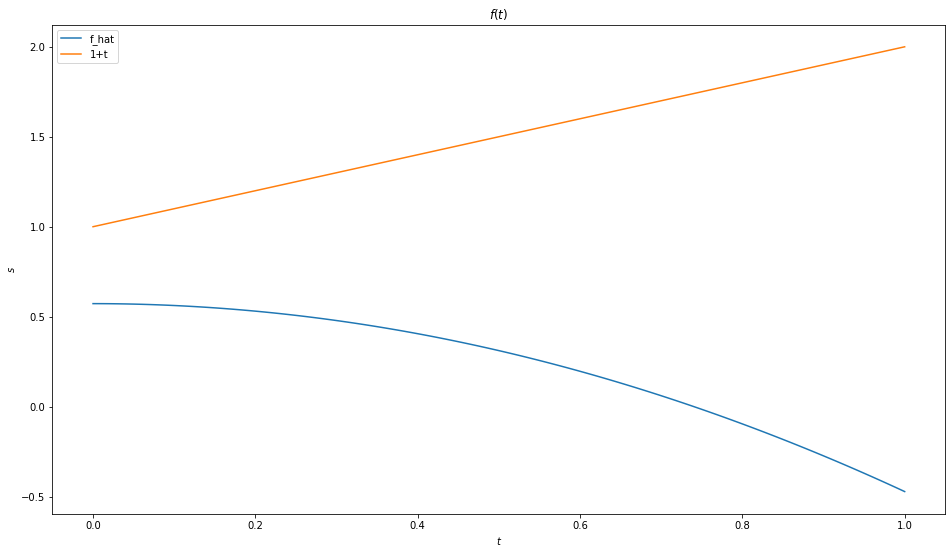

In [8]:
plt.figure(figsize=(16, 9))
plt.plot(si, f_hat)
plt.plot(ti, 1 + ti)
plt.ylabel(r'$s$')
plt.xlabel(r'$t$')
plt.title(r'$f(t)$')
plt.legend(["f_hat",'1+t'])
plt.show()

There is still difference between our approximation and actual answer. 

Let us take some look at the differences when changing the value of "n".
First, we will have to define some functions for the advantage of the convenience of changing variebles.

In [9]:
def construct_Kij_gi(n):
    si = np.linspace(0, 1, n)
    ti = si
    Kij = np.zeros((n, n))
    gi = np.zeros(n)
    for i in range(n):
        for j in range(n):
            Kij[(i, j)] = K(si[i], ti[j]) / n
    for i in range(n):
        gi[i] = g(si[i])
    return Kij, gi

def func_f_hat(n):
    Kij, gi = construct_Kij_gi(n)
    U, sigma, VT = LA.svd(Kij)
    
    h = np.zeros(n)
    f_hat = np.zeros(n)
    r = 2
    for i in range(r):
        h[i] = np.dot(U[i], gi) / sigma[i]
    for i in range(n):
        f_hat[i] = np.dot(VT.T[i], h)
    return f_hat

Then, we can see what changes for $n=2,5,10,20,30,50$.

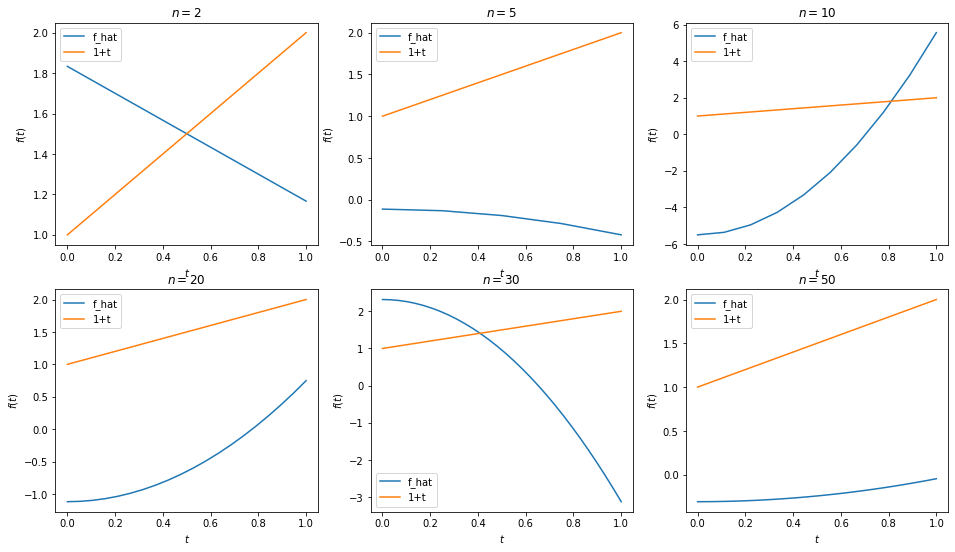

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(16,9))
B=[2,5,10,20,30,50]
for idx, ax in enumerate(axes. flatten()):
    b = B[idx]
    
    si_1 = np.linspace(0, 1, b)
    ti_1 = si_1
    ax.plot(si_1, func_f_hat(b))
    ax.plot(ti_1, 1 + ti_1)
    ax.set_ylabel(r'$f(t)$')
    ax.set_xlabel(r'$t$')
    ax.set_title(r'$n=$%d'%b)
    ax.legend(["f_hat",'1+t'])
plt.show()

#### (d) An alternative way to find solution of (4a) is to solve the following regularized problem by including a penalty term: $$f_\alpha =argmin_{f \in R^n}||Kf-g||_2^2+\alpha \Phi(f)\;\;\;(4c) $$where $\alpha\in R_+$ is a parameter, and $\Phi(f)$ is a function that may be chosen as $\Phi(f)=||f||_2^2$ or $\Phi(f)=TV(f)=\sum_{i=1}^{n-1}|f_{i+1}-f_i|$. With a chosen $\alpha$ and $\Phi$, find solution of (4c).

If choosing $\Phi(f)=||f||_2^2$, $f_\alpha =argmin_{f \in R^n}||Kf-g||_2^2+\alpha ||f||_2^2$.

We can use $the\;Gradient\;Descent\;method$ to solve this question.\
Let $f= [x_{1},x_{2},...,x_{n}]^{T}\in \textbf{R}^{n} \text{, and }F(f) =||Kf-g||_2^2+\alpha ||f||_2^2$\
The gradient of $F$ can be computed as the result of $2 (K^{T}(Kf-g) + \alpha I_{n} f)$.\
By iteration, we can get an appraximation of $f_{\alpha}$ such that $||Kf-g||_2^2+\alpha ||f||_2^2$ have its minimum.

But we still need to find an approriate $\alpha$ such that we will have a better answer to the original problem.\
So, we first derive a function which can change the value of $\alpha$ easily in order to compare the results of different $\alpha$.

In [11]:
def func_ftheta(alpha,n):
    learning_rate = 0.01
    n_iterations = 5000
    Kij,gi = construct_Kij_gi(n) 
    gbar = gi[:,np.newaxis]

    #ftheta = np.ones((n,1))
    ftheta = np.random.rand(n,1)
    
    for iteration in range(n_iterations):
        
        #scores = np.dot(Kij,ftheta)
        scores = Kij.T @ ftheta
        #誤差值
        error = scores - gbar
        #x的shape(50,2) output_error的shapeｊ為(50,1) gradients為(2,1)
        gradients = 2 * (Kij.T @ error + alpha * (np.identity(n) @ ftheta))
        #每次對theta
        ftheta -= learning_rate * gradients
        #plt.plot(theta[0],theta[1],'o-',color='red')
    return ftheta

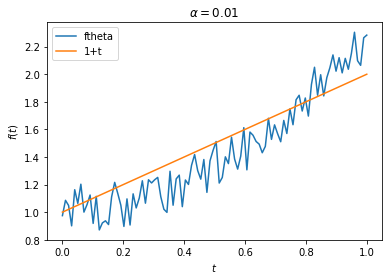

In [18]:
plt.plot(si, func_ftheta(0.01,n))
plt.plot(ti, 1 + ti)
plt.ylabel(r'$f(t)$')
plt.xlabel(r'$t$')
plt.title(r'$\alpha = 0.01$')
plt.legend(["ftheta",'1+t'])
plt.show()

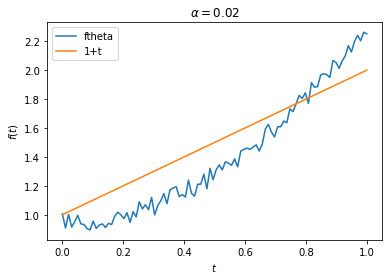

In [17]:
plt.plot(si, func_ftheta(0.02,n))
plt.plot(ti, 1 + ti)
plt.ylabel(r'$f(t)$')
plt.xlabel(r'$t$')
plt.title(r'$\alpha = 0.02$')
plt.legend(["ftheta",'1+t'])
plt.show()

We have found that when the value of $\alpha$ is about $0.01$ and $0.02$, the figures approximate better than the other $\alpha$s, naming the oscillations of the points and behavior of its slope.\
Now, we divide $[0.01, 0.02]$ into smaller intervals to get more precise approximation. 

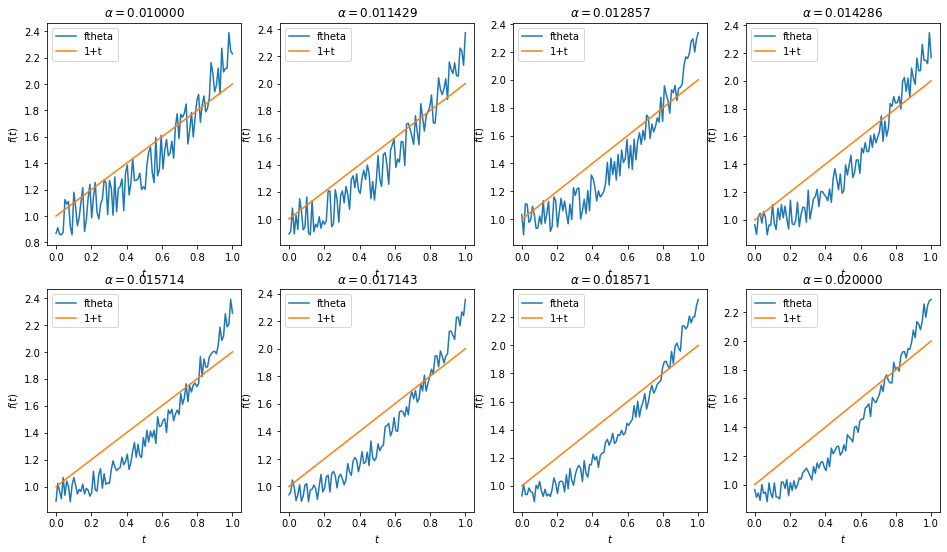

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(16,9))

for idx, ax in enumerate(axes.flatten()):
    a = 0.01 + idx * 0.01/7
    ax.plot(si, func_ftheta(a, n))
    ax.plot(ti, 1 + ti)
    ax.set_ylabel(r'$f(t)$')
    ax.set_xlabel(r'$t$')
    ax.set_title(r'$\alpha =$%f' %a)
    ax.legend(["ftheta",'1+t'])
plt.show()

## Reference
1. Singular Value Decomposition (SVD) (Trucco, Appendix A.6)\
https://www.cse.unr.edu/~bebis/CS791E/Notes/SVD.pdf
2. Class Materials
3. machine learning 下的 Linear Regression 實作(使用python)\
https://medium.com/@jacky308082/machine-learning-%E4%B8%8B%E7%9A%84-linear-regression-%E5%AF%A6%E4%BD%9C-%E4%BD%BF%E7%94%A8python-7e1dd03a4d46